In [10]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

In [18]:
df_preprocessed = pd.read_csv('../data/preprocessed_sleep.csv')
df = pd.read_csv('../data/processed_sleep_fft.csv')
con_ftrs = ['alpha', 'theta', 'slowwave', 'sigma']
cat_ftrs = ['channel_name', 'subject', 'NAP']
label = ['label']

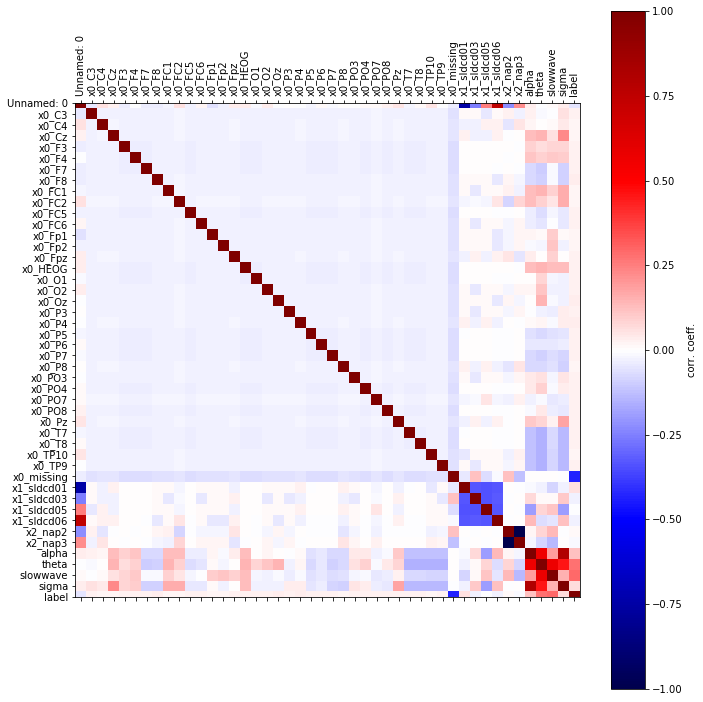

In [13]:
corr_matrix = df_preprocessed.corr()
#print(df_preprocessed.columns)
plt.figure(figsize=(10,10))
plt.matshow(corr_matrix,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(df_preprocessed.corr().shape[0]),list(df_preprocessed.corr().columns),rotation=90)
plt.yticks(np.arange(df_preprocessed.corr().shape[0]),list(df_preprocessed.corr().columns))
plt.tight_layout()
plt.savefig('../figures/corr_coeff_dummies.png',dpi=300)
plt.show()

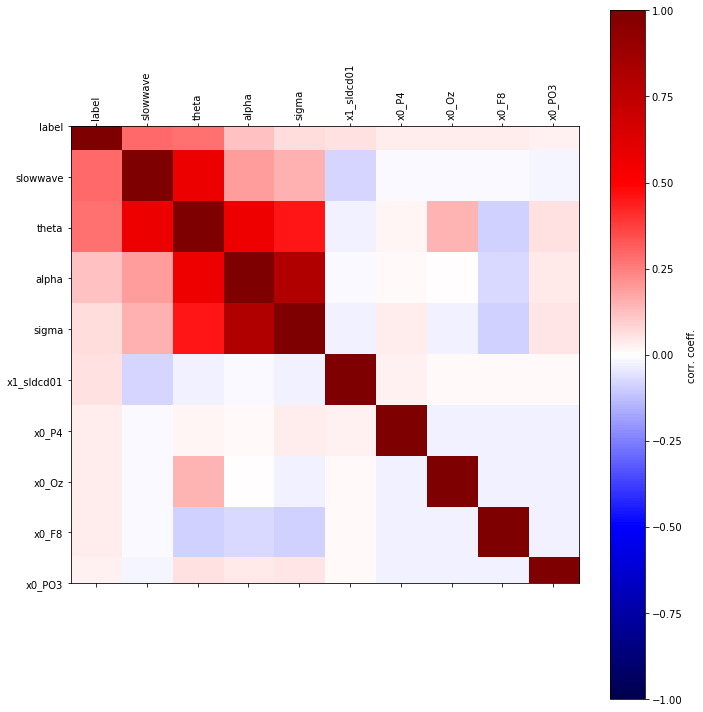

In [15]:
corrmat = df_preprocessed.corr()
#print(df_preprocessed.columns)
all_cols = corrmat.sort_values('label',ascending=False)['label'].index 
cols = all_cols[:10] # positively correlated features

cm = corrmat.loc[cols,cols]

plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm.shape[0]),list(cols))
plt.tight_layout()
plt.savefig('../figures/corr_coeff_dummies_poscorr.png',dpi=300)
plt.show()

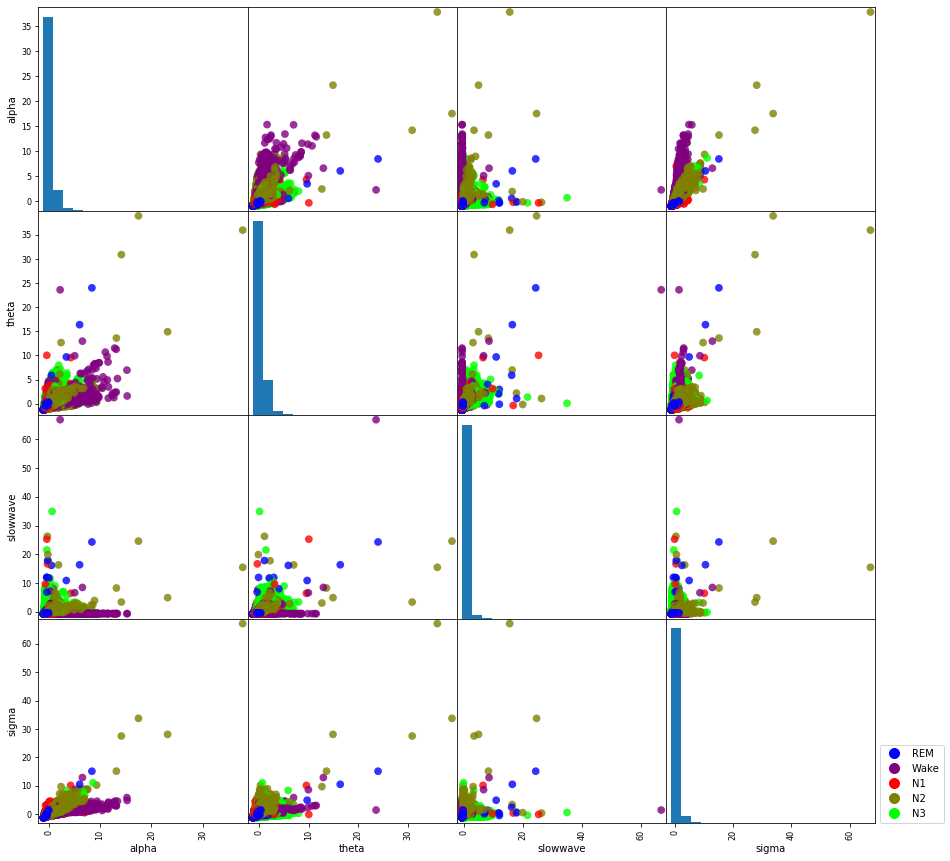

In [35]:
pd.plotting.scatter_matrix(df_preprocessed[con_ftrs],c = df_preprocessed['label'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap = 'brg')
handles = [plt.plot([],[],color=plt.cm.brg(i/4.), ls="", marker="o", \
                    markersize=10)[0] for i in range(5)]
labels=["REM", "Wake", "N1", "N2", "N3"]
plt.legend(handles, labels, loc=(1.02,0))
plt.savefig('../figures/scattermatrix.png',dpi=300)
plt.show()

In [36]:
count_matrix = df.groupby(['NAP', 'label']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

label  -1.0   0.0   1.0   2.0   3.0
NAP                                
nap2   2053  3975  2069  6663  7911
nap3   2814  2229  2395  8997  6335
label      -1.0       0.0       1.0       2.0       3.0
NAP                                                    
nap2   0.090556  0.175334  0.091262  0.293900  0.348948
nap3   0.123584  0.097892  0.105182  0.395125  0.278217


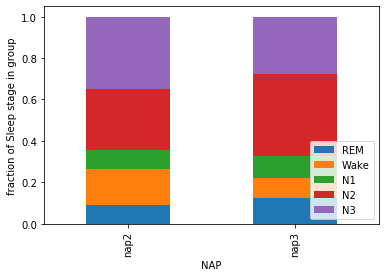

In [38]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of Sleep stage in group')
plt.legend(labels,loc=4)
plt.savefig('../figures/stacked_bar_stgpct.png',dpi=300)
plt.show()

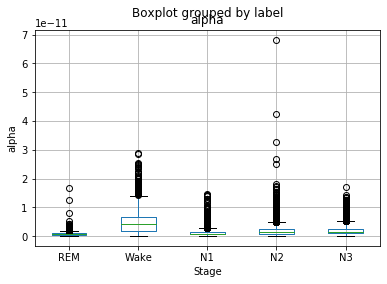

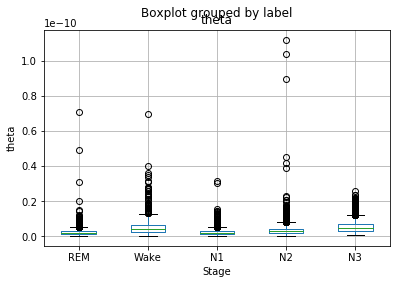

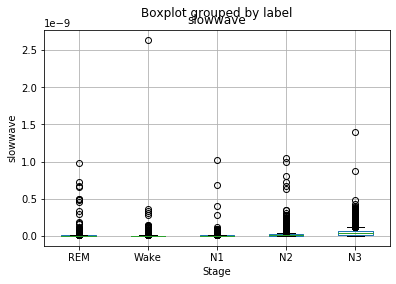

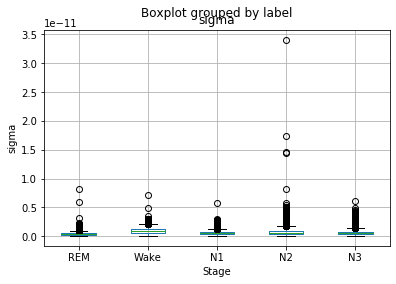

In [45]:
for i in range(len(con_ftrs)):
    df[[con_ftrs[i],'label']].boxplot(by='label')
    plt.ylabel(con_ftrs[i])
    plt.xlabel('Stage')
    plt.xticks([1, 2, 3, 4, 5], labels)
    fn = '../figures/boxplot' + con_ftrs[i]
    plt.savefig(fn,dpi=300)
    plt.show()

In [ ]:
# feature engineering 
